In [8]:
%pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python matplotlib


  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using legacy 'setup.py install' for termcolor, since package 'wheel' is not installed.
Using legacy 'setup.py install' for wrapt, since package 'wheel' is not installed.
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1.17.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\user\\AppData\\Local\\Programs\\Python\\Python38\\Lib\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [3]:
%pip install matplotlib  keras os 


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [4]:
%pip install  opencv-python matplotlib


  Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl (7.5 MB)


You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


1.2Now we can try to import standard dependencies. 

In [2]:
import cv2
import numpy as np   
import random 
import os
from matplotlib import pyplot as plt 

In [11]:
%pip install tensorflow

  Using cached tensorflow-2.13.1-cp38-cp38-win_amd64.whl (1.9 kB)
  Using cached tensorflow-2.13.0-cp38-cp38-win_amd64.whl (1.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Using cached grpcio-1.69.0-cp38-cp38-win_amd64.whl (4.4 MB)
  Using cached h5py-3.11.0-cp38-cp38-win_amd64.whl (3.0 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached numpy-1.24.3-cp38-cp38-win_amd64.whl (14.9 MB)
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached Markdown-3.7-py3-none-any.whl (106 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl (2.4 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Attempting uninstall: tensorboard-data-server
    Found exi

You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [3]:
#now we import Tensorflow dependencies -functional API
from tensorflow.keras  import Model  
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
from tensorflow.keras.models import load_model
import tensorflow as tf


1.3setting our gpu growth 

In [14]:
#evading any OOM errors 
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True )

1.4 Setting up our folder structures 

In [15]:
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [26]:
#now u gotta actually mk the directories 
os.makedirs('POS_PATH')
os.makedirs('NEG_PATH')
os.makedirs('ANC_PATH')

2.1 Now we are ready to collect our positives and anchor images 

2.2 Untar LFW dataset 

In [ ]:
  # http://vis-www.cs.umass.edu/lfw/ 

In [1]:
#Uncompress tar CZ LFW dataset
!tar -xf lfw.tgz 

In [33]:
#move lfw images to the following repo FACIAL_REC/NEG

for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw',directory,file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

2.2 Now we collect the positive and anchor classes


In [6]:
#Import uuid(univerally unique identifier) library to generate unique names for our images 
import uuid 

In [ ]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

In [104]:
#Establish a connection to the webcam 
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    #adjusting the frame to 250 by 250 
    frame = frame[120:120+250, 200:200+250, :]
    
    #collect anchors 
    if cv2.waitKey(1) & 0XFF  == ord('a'):
        #create unique file path 
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        #write out anchor image 
        cv2.imwrite(imgname, frame)
    #collect positives 
    if cv2.waitKey(1) & 0XFF  == ord('p'):
        #create unique file path 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        #write out positve image 
        cv2.imwrite(imgname, frame)
    
    #show image back to screen 
    cv2.imshow('Image collection', frame)
    #breaking gracefully 
    if cv2.waitKey(1) & 0XFF  == ord('q'):
        break
#release the webcam 
cap.release()
#close the image show frame. 
cv2.destroyAllWindows()    

In [ ]:
plt.imshow(frame[120:120+250,200:200+250, :])

3.Now we Load and Preprocess the Images.

3.1 Getting the image directories.

In [16]:
anchor = tf.data.Dataset.list_files(ANC_PATH+ '/*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+ '/*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+ '/*.jpg').take(300)

In [17]:
dir_test = anchor.as_numpy_iterator()

In [18]:
print(dir_test.next())

b'data\\anchor\\50cb9bde-ce76-11ef-83fd-f894c231a690.jpg'


3.2 Preprocessing (scale and resize )

In [19]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100, 100))
    #ensuring that I am getting my three channels 
    #img = tf.ensure_shape(img, (100, 100, 3))
    # Scale image to be between 0 and 1 
    img = img / 255.0

    # Return image
    return img

In [20]:
img = preprocess('data\\anchor\\7de92db1-ce76-11ef-8177-f894c231a690.jpg')

In [21]:
img.numpy().max()

0.8776961

In [ ]:
plt.imshow(img)

In [ ]:
dataset.map(preprocess)

3.3 Create labelled Dataset 

In [252]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0

In [23]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [24]:
samples = data.as_numpy_iterator()

In [25]:
exampple = samples.next()

In [26]:
exampple

(b'data\\anchor\\50ba10ad-ce76-11ef-8412-f894c231a690.jpg',
 b'data\\positive\\a9fa4ea8-ce76-11ef-8a84-f894c231a690.jpg',
 1.0)

3.4 Building, Training and testing the partiton 

In [27]:
def preprocess_twin(input_img, validation_img, label):
      return(preprocess(input_img), preprocess(validation_img), label)

In [28]:
res = preprocess_twin(*exampple)

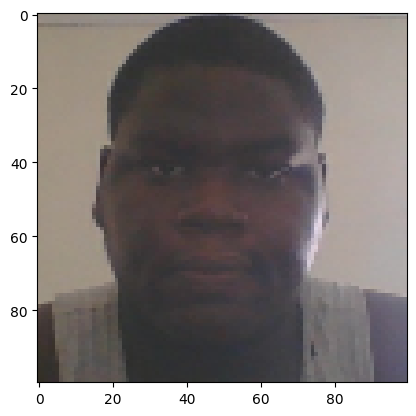

In [333]:
plt.imshow(res[1])

In [29]:
res[2]

1.0

In [30]:
#build data loader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [31]:
data

<_ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [32]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [33]:
(train_data)


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [34]:
train_sample = train_data.as_numpy_iterator()

In [35]:
train_sample = train_sample.next()

In [36]:
len(train_sample[0])

16

In [37]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

4.Engineering the Model 

4.1 Building Embedding layer

In [38]:
inp = Input(shape=(100,100,3), name='input_image')

In [39]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [40]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [41]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [42]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [43]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [44]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [45]:
mod.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2  (None, 46, 46, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 128)       26

In [46]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [47]:
embedding = make_embedding()

In [48]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 46, 46, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 128)       26

4.2 Build distance layer 

In [5]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)


In [50]:
l1 = L1Dist()

In [279]:
l1(anchor_embedding, validation_embedding)

NameError: name 'anchor_embedding' is not defined

4.3 Make Siamese Model 

In [51]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [52]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [53]:
siamese_layer = L1Dist()

In [54]:
distances = siamese_layer(inp_embedding, val_embedding)

In [55]:
classifier = Dense(1, activation='sigmoid')(distances)

In [56]:
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2')>

In [57]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [58]:
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [59]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [60]:
siamese_model = make_siamese_model()

In [61]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

5.Training on 

5.1 Setting up loss optimizer

In [62]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [63]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

5.2 Establish Checkpoints

In [64]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

5.3 Build Train Setup Function 

In [65]:
test_batch = train_data.as_numpy_iterator()

In [66]:
batch_1 = test_batch.next()

In [67]:
len(batch_1[1]) 


16

In [68]:
X = batch_1[:2]

In [69]:
y = batch_1[2]

In [70]:
y

array([1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1.],
      dtype=float32)

In [71]:
tf.losses.BinaryCrossentropy??

Init signature:
tf.losses.BinaryCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction='auto',
    name='binary_crossentropy',
)
Source:        
class BinaryCrossentropy(LossFunctionWrapper):
    """Computes the cross-entropy loss between true labels and predicted labels.

    Use this cross-entropy loss for binary (0 or 1) classification applications.
    The loss function requires the following inputs:

    - `y_true` (true label): This is either 0 or 1.
    - `y_pred` (predicted value): This is the model's prediction, i.e, a single
      floating-point value which either represents a
      [logit](https://en.wikipedia.org/wiki/Logit), (i.e, value in [-inf, inf]
      when `from_logits=True`) or a probability (i.e, value in [0., 1.] when
      `from_logits=False`).

    **Recommended Usage:** (set `from_logits=True`)

    With `tf.keras` API:

    ```python
    model.compile(
      loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
      ....

In [72]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
        
    # Return loss
    return loss

5.4 Build Training Loop

In [73]:
from tensorflow.keras.metrics import Precision, Recall

In [74]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Creating a metric object 
        r = Recall()
        p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix) 

5.5 Training the model 

In [75]:
EPOCHS = 50

In [79]:
with tf.device('/GPU:0'):
    train(train_data, EPOCHS)


 Epoch 1/50
27/27 [==============================] - 1248s 46s/step
0.0032634372 1.0 1.0

 Epoch 2/50
27/27 [==============================] - 1230s 45s/step
6.578238e-05 1.0 1.0

 Epoch 3/50
27/27 [==============================] - 1237s 46s/step
0.0 1.0 1.0

 Epoch 4/50
27/27 [==============================] - 1199s 44s/step
0.0068006255 1.0 1.0

 Epoch 5/50
27/27 [==============================] - 1187s 44s/step
0.0011279947 1.0 1.0

 Epoch 6/50
27/27 [==============================] - 1197s 44s/step
1.3962579e-05 1.0 1.0

 Epoch 7/50
27/27 [==============================] - 1193s 44s/step
0.0007735863 1.0 1.0

 Epoch 8/50
27/27 [==============================] - 1192s 44s/step
0.0035986728 1.0 1.0

 Epoch 9/50
27/27 [==============================] - 1179s 44s/step
0.00019135942 1.0 1.0

 Epoch 10/50
27/27 [==============================] - 1134s 42s/step
8.642688e-07 1.0 1.0

 Epoch 11/50
27/27 [==============================] - 1121s 41s/step
5.3693115e-05 1.0 1.0

 Epoch 12/50


6 Evaluate Model

6.1 Import Metrics

In [80]:
#Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

6.2 Make Predictions

In [83]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [84]:
y_hat = siamese_model.predict([test_input, test_val])

1/1 [==============================] - 6s 6s/step


In [85]:
# Post processing the results 
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1]

In [86]:
y_true

array([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.],
      dtype=float32)

6.3 Calculate Metrics

In [87]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [89]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

0.33333334

In [90]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 

print(r.result().numpy(), p.result().numpy())

1/1 [==============================] - 1s 1s/step
1.0 1.0


6.4 Vitz Results

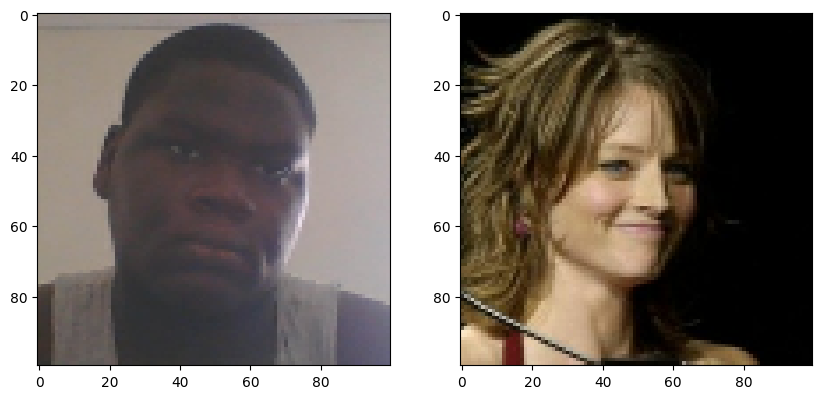

In [91]:
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[0])

# Renders cleanly
plt.show()

7.Save Model 

In [109]:
# Save weights
siamese_model.save('siamesemodelv2.h5')

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [6]:
# Reload model 
siamese_model = tf.keras.models.load_model('siamesemodelv2.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [94]:
# Make predictions with reloaded model
siamese_model.predict([test_input, test_val])

1/1 [==============================] - 2s 2s/step


array([[2.7357212e-08],
       [1.0000000e+00],
       [9.9999076e-01],
       [3.3732310e-09]], dtype=float32)

In [95]:
# View model summary
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

8.Real Time Test

8.1 Verification Function

In [7]:
os.makedirs(application_data, verification_images)

NameError: name 'application_data' is not defined

In [96]:
os.listdir(os.path.join('application_data', 'verification_images'))

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'application_data\\verification_images'

In [ ]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

In [ ]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

In [ ]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified